# 17. Matplotlib 퀴즈

다음은 대한민국 영화 중에서 관객 수가 가장 많은 상위 8개의 데이터이다.
주어진 코드를 이용해서 문제를 풀어보시오.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows
# matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

data = {
    '영화' : ['명량', '극한직업', '신과함께-죄와 벌', '국제시장', '괴물', '도둑들', '7번방의 선물', '암살'],
    '개봉 연도' : [2014, 2019, 2017, 2014, 2006, 2012, 2013, 2015],
    '관객 수' : [1761, 1626, 1441, 1426, 1301, 1298, 1281, 1270], # (단위 : 만 명)
    '평점' : [8.88, 9.20, 8.73, 9.16, 8.62, 7.64, 8.83, 9.10]
}
df = pd.DataFrame(data)
df

,영화,개봉 연도,관객 수,평점
0,명량,2014,1761,8.88
1,극한직업,2019,1626,9.20
2,신과함께-죄와 벌,2017,1441,8.73
3,국제시장,2014,1426,9.16
4,괴물,2006,1301,8.62
5,도둑들,2012,1298,7.64
6,7번방의 선물,2013,1281,8.83
7,암살,2015,1270,9.10


## 1) 영화 데이터를 활용하여 x 축은 영화, y 축은 평점인 막대 그래프를 만드시오. 

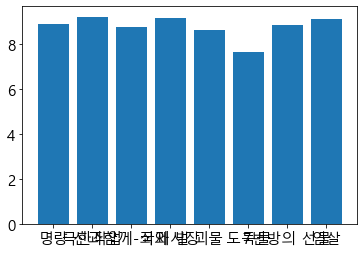

In [4]:
plt.bar(df['영화'], df['평점'])
plt.show()

## 2) 앞에서 만든 막대 그래프에 제시된 세부 사항을 적용하시오.

1. 제목 : 국내 Top8 영화 평점 정보
1. x축 label : 영화 (90도 회전)
1. y축 label : 평점

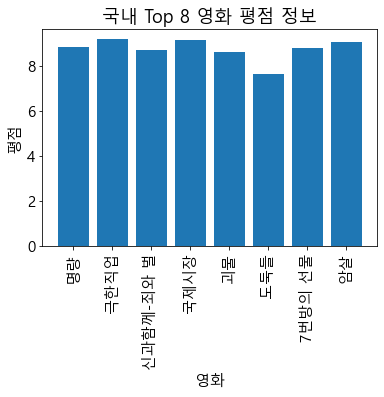

In [71]:
x_label = df['영화']
y_label = df['평점']
plt.bar(x_label, y_label)

plt.xlabel('영화')
plt.ylabel('평점')

plt.xticks(rotation = 90) # x축 90도 회전
plt.title("국내 Top 8 영화 평점 정보")
plt.show()

## 3) 개봉 연도별  평점 변화 추이를 꺾은선 그래프로 그리시오. 

### 연도별 평균 데이터를 구하는 코드는 다음과 같습니다. 

In [3]:
df_group = df.groupby('개봉 연도').mean()
df_group

,관객 수,평점
개봉 연도,,
2006,1301.0,8.62
2012,1298.0,7.64
2013,1281.0,8.83
2014,1593.5,9.02
2015,1270.0,9.10
2017,1441.0,8.73
2019,1626.0,9.20


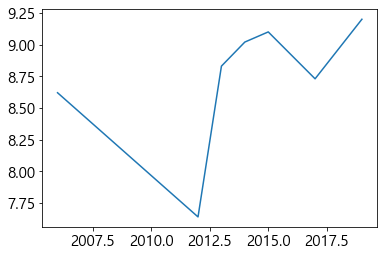

In [12]:
plt.plot(df_group.index, df_group['평점'])
plt.show()

## 4) 앞에서 만든 그래프에 제시된 세부 사항을 적용하시오.
1. marker : 'o'
1. x 축 눈금: 5년 단위 (2005, 2010, 2015, 2020)
1. y 축 범위: 최소 7, 최대 10

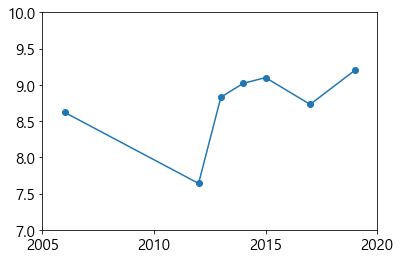

In [21]:
plt.plot(df_group.index, df_group['평점'], marker = 'o')

years = [2005, 2010, 2015, 2020]

plt.xticks(years)
plt.ylim(7, 10)
plt.show()

## 5) 평점이 9점 이상인 영화의 비율을 확인할 수 있는 원 그래프를 제시된 세부사항을 적용하여 그리시오.
1. label : 9점 이상 / 9점 미만
1. 퍼센트: 소수점 첫째자리까지 표시
1. 범례 : 그래프 우측에 표시

In [63]:
# 영화 나누기
filt = (df['평점'] >= 9)
high = df.loc[filt]
low = df.loc[~filt] 

# 정답
# high = len(df[filt])

high_count = high['영화'].count()
low_count = low['영화'].count()

5

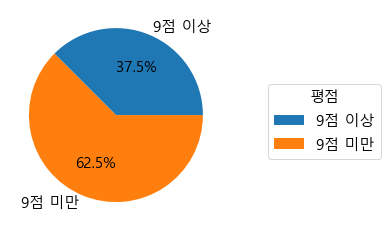

In [74]:
values = [high_count, low_count]
labels = ['9점 이상', '9점 미만']

plt.pie(values,labels = labels, autopct = '%.1f%%')
plt.legend(loc =(1.2, 0.3), title = '평점')
plt.show()